In [9]:
import shutil
import glob
import tarfile
import os
import mne
import pandas as pd
import numpy as np
from tqdm import tqdm
import spkit as sp
import matplotlib.pyplot as plt
from directory_tree import display_tree
from mne_connectivity import spectral_connectivity_epochs
from mne.datasets import sample
import numpy as np
from collections import Counter

In [5]:
def ReadFile():
    EEG = []
    MetaData = pd.read_csv('/workspace/brail_poc3/experiments/Behavioural_Data_MPILMBB_LEMON/META_File_IDs_Age_Gender_Education_Drug_Smoke_SKID_LEMON.csv')
    for path in tqdm(sorted(glob.glob("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/*"))):
        print("Subject number:", path.split('/')[-1])
        Subjects = {}
        Subjects["Subject_Number"] = path.split('/')[-1]
        Subjects["prepSignal_EC"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EC.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
        Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
        Subjects["Age"] = MetaData[MetaData['Subject'] == Subjects["Subject_Number"]].iloc[0,2]
        Subjects["Age_Number"] = int(Subjects["Age"].split('-')[0])
        EEG.append(Subjects)
    return EEG

EEG = ReadFile()

  0%|                                                   | 0/201 [00:00<?, ?it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010002_EC.fdt) is incorrect, the file name must have changed on disk, using the correct file name (sub-032301_EC.fdt).
  Subjects["prepSignal_EC"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EC.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EC"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EC.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: The data contains 'boundary' events, indicating data di

Subject number: sub-032301


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
  0%|▏                                          | 1/201 [00:00<00:56,  3.53it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010003_EC.fdt) is incorrect, the file name mu

Subject number: sub-032302


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
  1%|▍                                          | 2/201 [00:00<00:55,  3.58it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010004_EC.fdt) is incorrect, the file name mu

Subject number: sub-032303


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
  1%|▋                                          | 3/201 [00:00<00:55,  3.60it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010005_EC.fdt) is incorrect, the file name mu

Subject number: sub-032304


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
  2%|▊                                          | 4/201 [00:01<00:54,  3.63it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010006_EC.fdt) is incorrect, the file name mu

Subject number: sub-032305


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
  2%|█                                          | 5/201 [00:01<00:53,  3.70it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010007_EC.fdt) is incorrect, the file name mu

Subject number: sub-032306


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
  3%|█▎                                         | 6/201 [00:01<00:52,  3.73it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010010_EC.fdt) is incorrect, the file name mu

Subject number: sub-032307


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
  3%|█▍                                         | 7/201 [00:01<00:53,  3.64it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010012_EC.fdt) is incorrect, the file name mu

Subject number: sub-032308


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
  4%|█▋                                         | 8/201 [00:02<00:52,  3.65it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010016_EC.fdt) is incorrect, the file name mu

Subject number: sub-032310


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
  4%|█▉                                         | 9/201 [00:02<00:52,  3.67it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010017_EC.fdt) is incorrect, the file name mu

Subject number: sub-032311


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
  5%|██                                        | 10/201 [00:02<00:52,  3.66it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010019_EC.fdt) is incorrect, the file name mu

Subject number: sub-032312


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
  5%|██▎                                       | 11/201 [00:03<00:51,  3.69it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010020_EC.fdt) is incorrect, the file name mu

Subject number: sub-032313


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
  6%|██▌                                       | 12/201 [00:03<00:49,  3.83it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010021_EC.fdt) is incorrect, the file name mu

Subject number: sub-032314


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
  6%|██▋                                       | 13/201 [00:03<00:49,  3.82it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010022_EC.fdt) is incorrect, the file name mu

Subject number: sub-032315


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
  7%|██▉                                       | 14/201 [00:03<00:49,  3.75it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010023_EC.fdt) is incorrect, the file name mu

Subject number: sub-032316


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
  7%|███▏                                      | 15/201 [00:04<00:49,  3.79it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010024_EC.fdt) is incorrect, the file name mu

Subject number: sub-032317


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
  8%|███▎                                      | 16/201 [00:04<00:49,  3.76it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010026_EC.fdt) is incorrect, the file name mu

Subject number: sub-032318


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
  8%|███▌                                      | 17/201 [00:04<00:48,  3.78it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010027_EC.fdt) is incorrect, the file name mu

Subject number: sub-032319


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
  9%|███▊                                      | 18/201 [00:04<00:48,  3.77it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010028_EC.fdt) is incorrect, the file name mu

Subject number: sub-032320


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
  9%|███▉                                      | 19/201 [00:05<00:48,  3.73it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010029_EC.fdt) is incorrect, the file name mu

Subject number: sub-032321


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 10%|████▏                                     | 20/201 [00:05<00:48,  3.71it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010030_EC.fdt) is incorrect, the file name mu

Subject number: sub-032322


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 10%|████▍                                     | 21/201 [00:05<00:48,  3.71it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010031_EC.fdt) is incorrect, the file name mu

Subject number: sub-032323


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 11%|████▌                                     | 22/201 [00:05<00:47,  3.73it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010032_EC.fdt) is incorrect, the file name mu

Subject number: sub-032324


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 11%|████▊                                     | 23/201 [00:06<00:47,  3.75it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010033_EC.fdt) is incorrect, the file name mu

Subject number: sub-032325


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 12%|█████                                     | 24/201 [00:06<00:47,  3.75it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010034_EC.fdt) is incorrect, the file name mu

Subject number: sub-032326


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 12%|█████▏                                    | 25/201 [00:06<00:46,  3.80it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010035_EC.fdt) is incorrect, the file name mu

Subject number: sub-032327


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 13%|█████▍                                    | 26/201 [00:06<00:46,  3.78it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010036_EC.fdt) is incorrect, the file name mu

Subject number: sub-032328


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 13%|█████▋                                    | 27/201 [00:07<00:45,  3.80it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010037_EC.fdt) is incorrect, the file name mu

Subject number: sub-032329


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 14%|█████▊                                    | 28/201 [00:07<00:46,  3.69it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010038_EC.fdt) is incorrect, the file name mu

Subject number: sub-032330


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 14%|██████                                    | 29/201 [00:07<00:47,  3.59it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010039_EC.fdt) is incorrect, the file name mu

Subject number: sub-032331


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 15%|██████▎                                   | 30/201 [00:08<00:46,  3.65it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010040_EC.fdt) is incorrect, the file name mu

Subject number: sub-032332


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 15%|██████▍                                   | 31/201 [00:08<00:46,  3.66it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010041_EC.fdt) is incorrect, the file name mu

Subject number: sub-032333


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 16%|██████▋                                   | 32/201 [00:08<00:46,  3.61it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010042_EC.fdt) is incorrect, the file name mu

Subject number: sub-032334


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 16%|██████▉                                   | 33/201 [00:08<00:46,  3.65it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010044_EC.fdt) is incorrect, the file name mu

Subject number: sub-032336


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 17%|███████                                   | 34/201 [00:09<00:45,  3.67it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010045_EC.fdt) is incorrect, the file name mu

Subject number: sub-032337


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 17%|███████▎                                  | 35/201 [00:09<00:44,  3.72it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010046_EC.fdt) is incorrect, the file name mu

Subject number: sub-032338


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 18%|███████▌                                  | 36/201 [00:09<00:43,  3.75it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010047_EC.fdt) is incorrect, the file name mu

Subject number: sub-032339


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 18%|███████▋                                  | 37/201 [00:09<00:43,  3.75it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010048_EC.fdt) is incorrect, the file name mu

Subject number: sub-032340


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 19%|███████▉                                  | 38/201 [00:10<00:43,  3.75it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010049_EC.fdt) is incorrect, the file name mu

Subject number: sub-032341


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 19%|████████▏                                 | 39/201 [00:10<00:43,  3.75it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010050_EC.fdt) is incorrect, the file name mu

Subject number: sub-032342


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 20%|████████▎                                 | 40/201 [00:10<00:42,  3.76it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010051_EC.fdt) is incorrect, the file name mu

Subject number: sub-032343


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 20%|████████▌                                 | 41/201 [00:11<00:41,  3.83it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010052_EC.fdt) is incorrect, the file name mu

Subject number: sub-032344


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 21%|████████▊                                 | 42/201 [00:11<00:41,  3.80it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010053_EC.fdt) is incorrect, the file name mu

Subject number: sub-032345


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 21%|████████▉                                 | 43/201 [00:11<00:41,  3.81it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010056_EC.fdt) is incorrect, the file name mu

Subject number: sub-032346


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 22%|█████████▏                                | 44/201 [00:11<00:41,  3.78it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010059_EC.fdt) is incorrect, the file name mu

Subject number: sub-032347


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 22%|█████████▍                                | 45/201 [00:12<00:42,  3.69it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010060_EC.fdt) is incorrect, the file name mu

Subject number: sub-032348


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 23%|█████████▌                                | 46/201 [00:12<00:41,  3.70it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010061_EC.fdt) is incorrect, the file name mu

Subject number: sub-032349


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 23%|█████████▊                                | 47/201 [00:12<00:41,  3.72it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010062_EC.fdt) is incorrect, the file name mu

Subject number: sub-032350


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 24%|██████████                                | 48/201 [00:12<00:40,  3.74it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010063_EC.fdt) is incorrect, the file name mu

Subject number: sub-032351


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 24%|██████████▏                               | 49/201 [00:13<00:40,  3.73it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010064_EC.fdt) is incorrect, the file name mu

Subject number: sub-032352


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 25%|██████████▍                               | 50/201 [00:13<00:40,  3.76it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010066_EC.fdt) is incorrect, the file name mu

Subject number: sub-032354


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 25%|██████████▋                               | 51/201 [00:13<00:40,  3.74it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010067_EC.fdt) is incorrect, the file name mu

Subject number: sub-032355


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 26%|██████████▊                               | 52/201 [00:13<00:40,  3.70it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010068_EC.fdt) is incorrect, the file name mu

Subject number: sub-032356


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 26%|███████████                               | 53/201 [00:14<00:39,  3.74it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010069_EC.fdt) is incorrect, the file name mu

Subject number: sub-032357


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 27%|███████████▎                              | 54/201 [00:14<00:38,  3.77it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010070_EC.fdt) is incorrect, the file name mu

Subject number: sub-032358


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 27%|███████████▍                              | 55/201 [00:14<00:39,  3.72it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010071_EC.fdt) is incorrect, the file name mu

Subject number: sub-032359


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 28%|███████████▋                              | 56/201 [00:15<00:38,  3.72it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010072_EC.fdt) is incorrect, the file name mu

Subject number: sub-032360


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 28%|███████████▉                              | 57/201 [00:15<00:38,  3.74it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010073_EC.fdt) is incorrect, the file name mu

Subject number: sub-032361


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 29%|████████████                              | 58/201 [00:15<00:38,  3.71it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010074_EC.fdt) is incorrect, the file name mu

Subject number: sub-032362


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 29%|████████████▎                             | 59/201 [00:15<00:38,  3.73it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010075_EC.fdt) is incorrect, the file name mu

Subject number: sub-032363


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 30%|████████████▌                             | 60/201 [00:16<00:37,  3.72it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010076_EC.fdt) is incorrect, the file name mu

Subject number: sub-032364


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 30%|████████████▋                             | 61/201 [00:16<00:37,  3.73it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010079_EC.fdt) is incorrect, the file name mu

Subject number: sub-032367


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 31%|████████████▉                             | 62/201 [00:16<00:36,  3.79it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010080_EC.fdt) is incorrect, the file name mu

Subject number: sub-032368


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 31%|█████████████▏                            | 63/201 [00:16<00:36,  3.80it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010081_EC.fdt) is incorrect, the file name mu

Subject number: sub-032369


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 32%|█████████████▎                            | 64/201 [00:17<00:36,  3.74it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010083_EC.fdt) is incorrect, the file name mu

Subject number: sub-032370


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 32%|█████████████▌                            | 65/201 [00:17<00:36,  3.76it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010084_EC.fdt) is incorrect, the file name mu

Subject number: sub-032371


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 33%|█████████████▊                            | 66/201 [00:17<00:35,  3.76it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010085_EC.fdt) is incorrect, the file name mu

Subject number: sub-032372


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 33%|██████████████                            | 67/201 [00:17<00:35,  3.76it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010086_EC.fdt) is incorrect, the file name mu

Subject number: sub-032373


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 34%|██████████████▏                           | 68/201 [00:18<00:35,  3.78it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010088_EC.fdt) is incorrect, the file name mu

Subject number: sub-032375


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 34%|██████████████▍                           | 69/201 [00:18<00:34,  3.78it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010089_EC.fdt) is incorrect, the file name mu

Subject number: sub-032376


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 35%|██████████████▋                           | 70/201 [00:18<00:34,  3.80it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010090_EC.fdt) is incorrect, the file name mu

Subject number: sub-032377


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 35%|██████████████▊                           | 71/201 [00:19<00:34,  3.79it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010091_EC.fdt) is incorrect, the file name mu

Subject number: sub-032378


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 36%|███████████████                           | 72/201 [00:19<00:33,  3.79it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010092_EC.fdt) is incorrect, the file name mu

Subject number: sub-032379


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 36%|███████████████▎                          | 73/201 [00:19<00:33,  3.79it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010093_EC.fdt) is incorrect, the file name mu

Subject number: sub-032380


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 37%|███████████████▍                          | 74/201 [00:19<00:33,  3.80it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010094_EC.fdt) is incorrect, the file name mu

Subject number: sub-032381


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 37%|███████████████▋                          | 75/201 [00:20<00:33,  3.78it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010104_EC.fdt) is incorrect, the file name mu

Subject number: sub-032383


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 38%|███████████████▉                          | 76/201 [00:20<00:33,  3.71it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010126_EC.fdt) is incorrect, the file name mu

Subject number: sub-032385


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 38%|████████████████                          | 77/201 [00:20<00:33,  3.65it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010134_EC.fdt) is incorrect, the file name mu

Subject number: sub-032386


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 39%|████████████████▎                         | 78/201 [00:20<00:33,  3.68it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010136_EC.fdt) is incorrect, the file name mu

Subject number: sub-032387


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 39%|████████████████▌                         | 79/201 [00:21<00:33,  3.69it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010137_EC.fdt) is incorrect, the file name mu

Subject number: sub-032388


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 40%|████████████████▋                         | 80/201 [00:21<00:32,  3.71it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010138_EC.fdt) is incorrect, the file name mu

Subject number: sub-032389


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 40%|████████████████▉                         | 81/201 [00:21<00:32,  3.73it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010141_EC.fdt) is incorrect, the file name mu

Subject number: sub-032390


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 41%|█████████████████▏                        | 82/201 [00:21<00:32,  3.71it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010142_EC.fdt) is incorrect, the file name mu

Subject number: sub-032391


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 41%|█████████████████▎                        | 83/201 [00:22<00:32,  3.67it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010146_EC.fdt) is incorrect, the file name mu

Subject number: sub-032392


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 42%|█████████████████▌                        | 84/201 [00:22<00:31,  3.68it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010148_EC.fdt) is incorrect, the file name mu

Subject number: sub-032393


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 42%|█████████████████▊                        | 85/201 [00:22<00:31,  3.71it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010150_EC.fdt) is incorrect, the file name mu

Subject number: sub-032394


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 43%|█████████████████▉                        | 86/201 [00:23<00:31,  3.71it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010152_EC.fdt) is incorrect, the file name mu

Subject number: sub-032395


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 43%|██████████████████▏                       | 87/201 [00:23<00:31,  3.61it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010155_EC.fdt) is incorrect, the file name mu

Subject number: sub-032396


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 44%|██████████████████▍                       | 88/201 [00:23<00:30,  3.65it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010157_EC.fdt) is incorrect, the file name mu

Subject number: sub-032397


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 44%|██████████████████▌                       | 89/201 [00:23<00:30,  3.71it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010162_EC.fdt) is incorrect, the file name mu

Subject number: sub-032398


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 45%|██████████████████▊                       | 90/201 [00:24<00:30,  3.66it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010163_EC.fdt) is incorrect, the file name mu

Subject number: sub-032399


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 45%|███████████████████                       | 91/201 [00:24<00:29,  3.70it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010164_EC.fdt) is incorrect, the file name mu

Subject number: sub-032400


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 46%|███████████████████▏                      | 92/201 [00:24<00:29,  3.73it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010165_EC.fdt) is incorrect, the file name mu

Subject number: sub-032401


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 46%|███████████████████▍                      | 93/201 [00:24<00:28,  3.73it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010166_EC.fdt) is incorrect, the file name mu

Subject number: sub-032402


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 47%|███████████████████▋                      | 94/201 [00:25<00:28,  3.76it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010168_EC.fdt) is incorrect, the file name mu

Subject number: sub-032403


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 47%|███████████████████▊                      | 95/201 [00:25<00:28,  3.77it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010170_EC.fdt) is incorrect, the file name mu

Subject number: sub-032405


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 48%|████████████████████                      | 96/201 [00:25<00:27,  3.77it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010176_EC.fdt) is incorrect, the file name mu

Subject number: sub-032406


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 48%|████████████████████▎                     | 97/201 [00:26<00:27,  3.77it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010183_EC.fdt) is incorrect, the file name mu

Subject number: sub-032407


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 49%|████████████████████▍                     | 98/201 [00:26<00:27,  3.79it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010191_EC.fdt) is incorrect, the file name mu

Subject number: sub-032408


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 49%|████████████████████▋                     | 99/201 [00:26<00:26,  3.79it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010192_EC.fdt) is incorrect, the file name mu

Subject number: sub-032409


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 50%|████████████████████▍                    | 100/201 [00:26<00:26,  3.80it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010194_EC.fdt) is incorrect, the file name mu

Subject number: sub-032411


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 50%|████████████████████▌                    | 101/201 [00:27<00:26,  3.81it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010195_EC.fdt) is incorrect, the file name mu

Subject number: sub-032412


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 51%|████████████████████▊                    | 102/201 [00:27<00:26,  3.79it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010196_EC.fdt) is incorrect, the file name mu

Subject number: sub-032413


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 51%|█████████████████████                    | 103/201 [00:27<00:26,  3.77it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010197_EC.fdt) is incorrect, the file name mu

Subject number: sub-032414


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 52%|█████████████████████▏                   | 104/201 [00:27<00:25,  3.76it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010199_EC.fdt) is incorrect, the file name mu

Subject number: sub-032415


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 52%|█████████████████████▍                   | 105/201 [00:28<00:25,  3.75it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010200_EC.fdt) is incorrect, the file name mu

Subject number: sub-032416


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 53%|█████████████████████▌                   | 106/201 [00:28<00:25,  3.76it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010201_EC.fdt) is incorrect, the file name mu

Subject number: sub-032417


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 53%|█████████████████████▊                   | 107/201 [00:28<00:25,  3.66it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010202_EC.fdt) is incorrect, the file name mu

Subject number: sub-032418


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 54%|██████████████████████                   | 108/201 [00:28<00:24,  3.72it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010204_EC.fdt) is incorrect, the file name mu

Subject number: sub-032420


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 54%|██████████████████████▏                  | 109/201 [00:29<00:24,  3.77it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010207_EC.fdt) is incorrect, the file name mu

Subject number: sub-032421


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 55%|██████████████████████▍                  | 110/201 [00:29<00:24,  3.73it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010210_EC.fdt) is incorrect, the file name mu

Subject number: sub-032422


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 55%|██████████████████████▋                  | 111/201 [00:29<00:24,  3.74it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010213_EC.fdt) is incorrect, the file name mu

Subject number: sub-032423


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 56%|██████████████████████▊                  | 112/201 [00:30<00:23,  3.71it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010214_EC.fdt) is incorrect, the file name mu

Subject number: sub-032424


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 56%|███████████████████████                  | 113/201 [00:30<00:23,  3.72it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010215_EC.fdt) is incorrect, the file name mu

Subject number: sub-032425


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 57%|███████████████████████▎                 | 114/201 [00:30<00:23,  3.71it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010218_EC.fdt) is incorrect, the file name mu

Subject number: sub-032427


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 57%|███████████████████████▍                 | 115/201 [00:30<00:23,  3.71it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010219_EC.fdt) is incorrect, the file name mu

Subject number: sub-032428


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 58%|███████████████████████▋                 | 116/201 [00:31<00:22,  3.77it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010220_EC.fdt) is incorrect, the file name mu

Subject number: sub-032429


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 58%|███████████████████████▊                 | 117/201 [00:31<00:22,  3.73it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010222_EC.fdt) is incorrect, the file name mu

Subject number: sub-032430


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 59%|████████████████████████                 | 118/201 [00:31<00:22,  3.73it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010223_EC.fdt) is incorrect, the file name mu

Subject number: sub-032431


/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EC"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EC.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EC"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EC.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Data file name in EEG.data (sub-010223_EO.fdt) is incorrect, the file name must have changed on disk, using the correct file name (sub-032431_EO.fdt).
  Subj

Subject number: sub-032432


/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EC"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EC.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EC"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EC.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Data file name in EEG.data (sub-010224_EO.fdt) is incorrect, the file name must have changed on disk, using the correct file name (sub-032432_EO.fdt).
  Subj

Subject number: sub-032434


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 60%|████████████████████████▋                | 121/201 [00:32<00:23,  3.45it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010227_EC.fdt) is incorrect, the file name mu

Subject number: sub-032435


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 61%|████████████████████████▉                | 122/201 [00:32<00:22,  3.44it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010228_EC.fdt) is incorrect, the file name mu

Subject number: sub-032436


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 61%|█████████████████████████                | 123/201 [00:33<00:22,  3.55it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010230_EC.fdt) is incorrect, the file name mu

Subject number: sub-032438


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 62%|█████████████████████████▎               | 124/201 [00:33<00:21,  3.51it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010231_EC.fdt) is incorrect, the file name mu

Subject number: sub-032439


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 62%|█████████████████████████▍               | 125/201 [00:33<00:21,  3.48it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010232_EC.fdt) is incorrect, the file name mu

Subject number: sub-032440


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 63%|█████████████████████████▋               | 126/201 [00:33<00:21,  3.45it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010233_EC.fdt) is incorrect, the file name mu

Subject number: sub-032441


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 63%|█████████████████████████▉               | 127/201 [00:34<00:21,  3.44it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010234_EC.fdt) is incorrect, the file name mu

Subject number: sub-032442


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 64%|██████████████████████████               | 128/201 [00:34<00:21,  3.44it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010236_EC.fdt) is incorrect, the file name mu

Subject number: sub-032444


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 64%|██████████████████████████▎              | 129/201 [00:34<00:21,  3.39it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010238_EC.fdt) is incorrect, the file name mu

Subject number: sub-032446


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 65%|██████████████████████████▌              | 130/201 [00:35<00:20,  3.40it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010239_EC.fdt) is incorrect, the file name mu

Subject number: sub-032447


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 65%|██████████████████████████▋              | 131/201 [00:35<00:20,  3.45it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010240_EC.fdt) is incorrect, the file name mu

Subject number: sub-032448


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Data file name in EEG.data (sub-010240_EO.fdt) is incorrect, the file name must have changed on disk, using the correct file name (sub-032448_EO.fdt).
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subj

Subject number: sub-032449


/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EC"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EC.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EC"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EC.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Data file name in EEG.data (sub-010241_EO.fdt) is incorrect, the file name must have changed on disk, using the correct file name (sub-032449_EO.fdt).
  Subj

Subject number: sub-032450


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 67%|███████████████████████████▎             | 134/201 [00:36<00:19,  3.36it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010243_EC.fdt) is incorrect, the file name mu

Subject number: sub-032451


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 67%|███████████████████████████▌             | 135/201 [00:36<00:19,  3.35it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010244_EC.fdt) is incorrect, the file name mu

Subject number: sub-032452


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 68%|███████████████████████████▋             | 136/201 [00:36<00:19,  3.40it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010245_EC.fdt) is incorrect, the file name mu

Subject number: sub-032453


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 68%|███████████████████████████▉             | 137/201 [00:37<00:18,  3.42it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010246_EC.fdt) is incorrect, the file name mu

Subject number: sub-032454


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 69%|████████████████████████████▏            | 138/201 [00:37<00:18,  3.44it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010247_EC.fdt) is incorrect, the file name mu

Subject number: sub-032455


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 69%|████████████████████████████▎            | 139/201 [00:37<00:18,  3.42it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010248_EC.fdt) is incorrect, the file name mu

Subject number: sub-032456


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 70%|████████████████████████████▌            | 140/201 [00:38<00:17,  3.43it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010249_EC.fdt) is incorrect, the file name mu

Subject number: sub-032457


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 70%|████████████████████████████▊            | 141/201 [00:38<00:17,  3.42it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010250_EC.fdt) is incorrect, the file name mu

Subject number: sub-032458


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 71%|████████████████████████████▉            | 142/201 [00:38<00:17,  3.43it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010251_EC.fdt) is incorrect, the file name mu

Subject number: sub-032459


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 71%|█████████████████████████████▏           | 143/201 [00:39<00:17,  3.41it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010252_EC.fdt) is incorrect, the file name mu

Subject number: sub-032460


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 72%|█████████████████████████████▎           | 144/201 [00:39<00:16,  3.40it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010254_EC.fdt) is incorrect, the file name mu

Subject number: sub-032462


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 72%|█████████████████████████████▌           | 145/201 [00:39<00:16,  3.40it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010255_EC.fdt) is incorrect, the file name mu

Subject number: sub-032463


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 73%|█████████████████████████████▊           | 146/201 [00:39<00:16,  3.37it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010256_EC.fdt) is incorrect, the file name mu

Subject number: sub-032464


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 73%|█████████████████████████████▉           | 147/201 [00:40<00:15,  3.38it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010257_EC.fdt) is incorrect, the file name mu

Subject number: sub-032465


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 74%|██████████████████████████████▏          | 148/201 [00:40<00:15,  3.42it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010258_EC.fdt) is incorrect, the file name mu

Subject number: sub-032466


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 74%|██████████████████████████████▍          | 149/201 [00:40<00:15,  3.43it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010260_EC.fdt) is incorrect, the file name mu

Subject number: sub-032467


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 75%|██████████████████████████████▌          | 150/201 [00:41<00:14,  3.43it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010261_EC.fdt) is incorrect, the file name mu

Subject number: sub-032468


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 75%|██████████████████████████████▊          | 151/201 [00:41<00:14,  3.45it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010262_EC.fdt) is incorrect, the file name mu

Subject number: sub-032469


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 76%|███████████████████████████████          | 152/201 [00:41<00:13,  3.50it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010263_EC.fdt) is incorrect, the file name mu

Subject number: sub-032470


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 76%|███████████████████████████████▏         | 153/201 [00:41<00:13,  3.51it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010264_EC.fdt) is incorrect, the file name mu

Subject number: sub-032471


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 77%|███████████████████████████████▍         | 154/201 [00:42<00:13,  3.53it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010265_EC.fdt) is incorrect, the file name mu

Subject number: sub-032472


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 77%|███████████████████████████████▌         | 155/201 [00:42<00:13,  3.47it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010266_EC.fdt) is incorrect, the file name mu

Subject number: sub-032473


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 78%|███████████████████████████████▊         | 156/201 [00:42<00:13,  3.44it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010267_EC.fdt) is incorrect, the file name mu

Subject number: sub-032474


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 78%|████████████████████████████████         | 157/201 [00:43<00:13,  3.37it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010268_EC.fdt) is incorrect, the file name mu

Subject number: sub-032475


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 79%|████████████████████████████████▏        | 158/201 [00:43<00:12,  3.35it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010269_EC.fdt) is incorrect, the file name mu

Subject number: sub-032476


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 79%|████████████████████████████████▍        | 159/201 [00:43<00:12,  3.37it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010270_EC.fdt) is incorrect, the file name mu

Subject number: sub-032477


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 80%|████████████████████████████████▋        | 160/201 [00:44<00:12,  3.37it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010271_EC.fdt) is incorrect, the file name mu

Subject number: sub-032478


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 80%|████████████████████████████████▊        | 161/201 [00:44<00:11,  3.39it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010272_EC.fdt) is incorrect, the file name mu

Subject number: sub-032479


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 81%|█████████████████████████████████        | 162/201 [00:44<00:11,  3.43it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010273_EC.fdt) is incorrect, the file name mu

Subject number: sub-032480


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 81%|█████████████████████████████████▏       | 163/201 [00:44<00:11,  3.42it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010274_EC.fdt) is incorrect, the file name mu

Subject number: sub-032481


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 82%|█████████████████████████████████▍       | 164/201 [00:45<00:10,  3.42it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010275_EC.fdt) is incorrect, the file name mu

Subject number: sub-032482


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 82%|█████████████████████████████████▋       | 165/201 [00:45<00:10,  3.35it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010276_EC.fdt) is incorrect, the file name mu

Subject number: sub-032483
Subject number: sub-032484


/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010277_EC.fdt) is incorrect, the file name must have changed on disk, using the correct file name (sub-032484_EC.fdt).
  Subjects["prepSignal_EC"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EC.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EC"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EC.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subj

Subject number: sub-032490


/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EC"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EC.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EC"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EC.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Data file name in EEG.data (sub-010283_EO.fdt) is incorrect, the file name must have changed on disk, using the correct file name (sub-032490_EO.fdt).
  Subj

Subject number: sub-032491


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 84%|██████████████████████████████████▍      | 169/201 [00:46<00:08,  3.63it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010286_EC.fdt) is incorrect, the file name mu

Subject number: sub-032493


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 85%|██████████████████████████████████▋      | 170/201 [00:46<00:08,  3.60it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010287_EC.fdt) is incorrect, the file name mu

Subject number: sub-032494


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 85%|██████████████████████████████████▉      | 171/201 [00:47<00:08,  3.52it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010288_EC.fdt) is incorrect, the file name mu

Subject number: sub-032495


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 86%|███████████████████████████████████      | 172/201 [00:47<00:08,  3.47it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010289_EC.fdt) is incorrect, the file name mu

Subject number: sub-032496


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Data file name in EEG.data (sub-010289_EO.fdt) is incorrect, the file name must have changed on disk, using the correct file name (sub-032496_EO.fdt).
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subj

Subject number: sub-032497


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 87%|███████████████████████████████████▍     | 174/201 [00:47<00:08,  3.32it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010291_EC.fdt) is incorrect, the file name mu

Subject number: sub-032498


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 87%|███████████████████████████████████▋     | 175/201 [00:48<00:07,  3.37it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010292_EC.fdt) is incorrect, the file name mu

Subject number: sub-032499


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 88%|███████████████████████████████████▉     | 176/201 [00:48<00:07,  3.37it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010294_EC.fdt) is incorrect, the file name mu

Subject number: sub-032501


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 88%|████████████████████████████████████     | 177/201 [00:48<00:07,  3.42it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010295_EC.fdt) is incorrect, the file name mu

Subject number: sub-032502


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 89%|████████████████████████████████████▎    | 178/201 [00:49<00:06,  3.39it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010296_EC.fdt) is incorrect, the file name mu

Subject number: sub-032503


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 89%|████████████████████████████████████▌    | 179/201 [00:49<00:06,  3.34it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010297_EC.fdt) is incorrect, the file name mu

Subject number: sub-032504


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 90%|████████████████████████████████████▋    | 180/201 [00:49<00:06,  3.34it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010298_EC.fdt) is incorrect, the file name mu

Subject number: sub-032505


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 90%|████████████████████████████████████▉    | 181/201 [00:50<00:05,  3.37it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010299_EC.fdt) is incorrect, the file name mu

Subject number: sub-032506


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 91%|█████████████████████████████████████    | 182/201 [00:50<00:06,  3.14it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010300_EC.fdt) is incorrect, the file name mu

Subject number: sub-032507


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 91%|█████████████████████████████████████▎   | 183/201 [00:50<00:05,  3.22it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010301_EC.fdt) is incorrect, the file name mu

Subject number: sub-032508


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 92%|█████████████████████████████████████▌   | 184/201 [00:50<00:05,  3.29it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010302_EC.fdt) is incorrect, the file name mu

Subject number: sub-032509


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 92%|█████████████████████████████████████▋   | 185/201 [00:51<00:04,  3.42it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010303_EC.fdt) is incorrect, the file name mu

Subject number: sub-032510


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 93%|█████████████████████████████████████▉   | 186/201 [00:51<00:04,  3.46it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010304_EC.fdt) is incorrect, the file name mu

Subject number: sub-032511


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 93%|██████████████████████████████████████▏  | 187/201 [00:51<00:04,  3.46it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010305_EC.fdt) is incorrect, the file name mu

Subject number: sub-032512


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 94%|██████████████████████████████████████▎  | 188/201 [00:52<00:03,  3.46it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010306_EC.fdt) is incorrect, the file name mu

Subject number: sub-032513


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 94%|██████████████████████████████████████▌  | 189/201 [00:52<00:03,  3.43it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010307_EC.fdt) is incorrect, the file name mu

Subject number: sub-032514


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 95%|██████████████████████████████████████▊  | 190/201 [00:52<00:03,  3.41it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010308_EC.fdt) is incorrect, the file name mu

Subject number: sub-032515


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 95%|██████████████████████████████████████▉  | 191/201 [00:53<00:02,  3.41it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010309_EC.fdt) is incorrect, the file name mu

Subject number: sub-032516


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 96%|███████████████████████████████████████▏ | 192/201 [00:53<00:02,  3.43it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010310_EC.fdt) is incorrect, the file name mu

Subject number: sub-032517


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 96%|███████████████████████████████████████▎ | 193/201 [00:53<00:02,  3.45it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010311_EC.fdt) is incorrect, the file name mu

Subject number: sub-032518


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 97%|███████████████████████████████████████▌ | 194/201 [00:53<00:02,  3.49it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010314_EC.fdt) is incorrect, the file name mu

Subject number: sub-032521


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 97%|███████████████████████████████████████▊ | 195/201 [00:54<00:01,  3.49it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010315_EC.fdt) is incorrect, the file name mu

Subject number: sub-032522


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 98%|███████████████████████████████████████▉ | 196/201 [00:54<00:01,  3.50it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010316_EC.fdt) is incorrect, the file name mu

Subject number: sub-032523


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 98%|████████████████████████████████████████▏| 197/201 [00:54<00:01,  3.50it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010317_EC.fdt) is incorrect, the file name mu

Subject number: sub-032524


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 99%|████████████████████████████████████████▍| 198/201 [00:54<00:00,  3.52it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010318_EC.fdt) is incorrect, the file name mu

Subject number: sub-032525


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
 99%|████████████████████████████████████████▌| 199/201 [00:55<00:00,  3.47it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010319_EC.fdt) is incorrect, the file name mu

Subject number: sub-032526


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
100%|████████████████████████████████████████▊| 200/201 [00:55<00:00,  3.40it/s]/tmp/ipykernel_72612/4144421588.py:8: RuntimeWarning: Data file name in EEG.data (sub-010321_EC.fdt) is incorrect, the file name mu

Subject number: sub-032528


/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
/tmp/ipykernel_72612/4144421588.py:9: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  Subjects["prepSignal_EO"] = mne.io.read_raw_eeglab("/workspace/brail_poc3/experiments/Lemon_PreEEGLAB/{}/{}/{}_EO.set".format(Subjects["Subject_Number"], Subjects["Subject_Number"], Subjects["Subject_Number"]), preload=True, verbose=False)
100%|█████████████████████████████████████████| 201/201 [00:55<00:00,  3.60it/s]


In [26]:
def splitEEG(prepEEG):
    epochs = []
    ordinal = lambda n: "%d%s" % (n,"tsnrhtdd"[(n//10%10!=1)*(n%10<4)*n%10::4])
    annotation_EC_df = prepEEG.annotations.to_data_frame()
    EC_sec = annotation_EC_df[annotation_EC_df.columns[0]].dt.strftime('%s.%f').astype(float) + 32400
    point_indices = annotation_EC_df.index[annotation_EC_df['description'] == 'boundary']
    BreakPoint = []
#     print(EC_sec[point_indices])
    for i, j in enumerate(EC_sec[point_indices]):
        if i == 0:
            BreakPoint.append([0, int(j)])
        else:
            BreakPoint.append([BreakPoint[-1][1], int(j)])
        if i == len(EC_sec[point_indices])-1:
            BreakPoint.append([int(j)+1, int(EC_sec.iloc[-1])])
#     print(BreakPoint)
    for i,d  in enumerate(BreakPoint): # Ignore the short duration between each braek point.
        if d[1] - d[0] < 15:
            del BreakPoint[i]
    for i, d in enumerate(BreakPoint):  # Splite each epoch by break point
#         print("The {} trial from {} to {}. ({}sec)".format(ordinal(i+1), d[0], d[1], d[1]-d[0]))
        epochs.append(prepEEG.copy().crop(tmin=d[0], tmax=d[1]))
#         print("------------------------------------------------")
    return epochs


# Splite EEG to epoches
print("------------------------------------------------")
print("Splite EEG to epoches")
EEG_epoches = []
for i in tqdm(range(len(EEG))):
    EEG_epoches.append(splitEEG(EEG[i]['prepSignal_EC']))
print(EEG_epoches)

------------------------------------------------
Splite EEG to epoches


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 201/201 [00:47<00:00,  4.22it/s]


[[<RawEEGLAB | sub-032301_EC.fdt, 59 x 14501 (58.0 s), ~6.6 MB, data loaded>, <RawEEGLAB | sub-032301_EC.fdt, 59 x 15001 (60.0 s), ~6.8 MB, data loaded>, <RawEEGLAB | sub-032301_EC.fdt, 59 x 15001 (60.0 s), ~6.8 MB, data loaded>, <RawEEGLAB | sub-032301_EC.fdt, 59 x 15001 (60.0 s), ~6.8 MB, data loaded>, <RawEEGLAB | sub-032301_EC.fdt, 59 x 14501 (58.0 s), ~6.6 MB, data loaded>, <RawEEGLAB | sub-032301_EC.fdt, 59 x 15001 (60.0 s), ~6.8 MB, data loaded>, <RawEEGLAB | sub-032301_EC.fdt, 59 x 15001 (60.0 s), ~6.8 MB, data loaded>, <RawEEGLAB | sub-032301_EC.fdt, 59 x 14251 (57.0 s), ~6.5 MB, data loaded>], [<RawEEGLAB | sub-032302_EC.fdt, 60 x 14501 (58.0 s), ~6.7 MB, data loaded>, <RawEEGLAB | sub-032302_EC.fdt, 60 x 15001 (60.0 s), ~6.9 MB, data loaded>, <RawEEGLAB | sub-032302_EC.fdt, 60 x 15001 (60.0 s), ~6.9 MB, data loaded>, <RawEEGLAB | sub-032302_EC.fdt, 60 x 14751 (59.0 s), ~6.8 MB, data loaded>, <RawEEGLAB | sub-032302_EC.fdt, 60 x 15001 (60.0 s), ~6.9 MB, data loaded>, <RawEEGL

In [38]:
def CauMI(data):
    len_channel = data.shape[0]
    print(len_channel)
    MI = np.zeros([len_channel,len_channel])
#     JE = np.zeros([len_channel,len_channel])
#     CE = np.zeros([len_channel,len_channel])
#     KL = np.zeros([len_channel,len_channel])
    for i in tqdm(range(len_channel)):
        x1 = data[:,i]
        for j in range(len_channel):  
            x2 = data[:,j]
#             print(x1)
            
            #Mutual Information
            MI[i,j] = sp.mutual_Info(x1,x2)

#             #Joint entropy
#             JE[i,j]= sp.entropy_joint(x1,x2)

#             #Cross Entropy
#             CE[i,j]= sp.entropy_cross(x1,x2)

#             #Diff Entropy
#             KL[i,j]= sp.entropy_kld(x1,x2)
    
    return MI

def EpochRotate(epoches):
    MIs = []
    for OneEpoch in epoches:
        Chan_PLI = []
        data = OneEpoch.get_data()
        MI = CauMI(data)
        MIs.append(np.array(Chan_PLI))
    return np.array(PLIs)

In [42]:
MI_Test = CauMI(EEG_epoches[0][0].get_data())
print(MI_Test)

59


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 59/59 [00:02<00:00, 22.00it/s]

[[2.58180005 1.36418349 0.92232426 ... 0.72177698 0.90509617 0.9626112 ]
 [1.36418349 3.16989026 1.73490819 ... 0.77340179 1.02074098 1.15632549]
 [0.92232426 1.73490819 2.76247521 ... 0.59567485 0.66450443 0.82879225]
 ...
 [0.72177698 0.77340179 0.59567485 ... 2.41015486 1.13880932 0.78155652]
 [0.90509617 1.02074098 0.66450443 ... 1.13880932 2.6086706  1.40200196]
 [0.9626112  1.15632549 0.82879225 ... 0.78155652 1.40200196 2.80516407]]


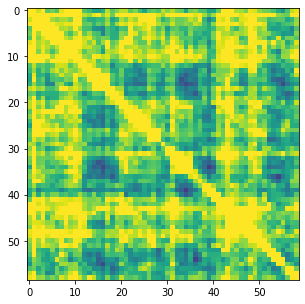

In [44]:
fig, axs = plt.subplots(1, 1, figsize=(5,5), sharey=True)
axs.imshow(MI_Test, vmin=0, vmax=1)